In [3]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)

In [4]:
import networkx as nx

## Affiliation Networks in NetworkX

In [5]:
# Import bipartite module
from networkx.algorithms import bipartite
from networkx import NetworkXError
# Load Zachary karate network
G = nx.karate_club_graph()
try:
    # Find and print node sets
    left, right = bipartite.sets(G)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Graph is not bipartite.


In [6]:
B = nx.Graph()
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])
try:
    # Find and print node sets
    left, right = bipartite.sets(B)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


In [7]:
bipartite.is_bipartite(B)

True

In [10]:
# Create data directory path
from pathlib import Path
data_dir = Path('.') / 'data'
B = nx.Graph()
with open(data_dir / 'bartomeus2008' / 'Bartomeus_Ntw_nceas.txt') as f:
    # Skip header row
    next(f)
    for row in f:
        # Break row into cells
        cells = row.strip().split('\t')
        # Get plant species and pollinator species
        plant = cells[4].replace('_', '\n')
        pollinator = cells[8].replace('_', '\n')
        B.add_edge(pollinator, plant)
        # Set node types
        B.nodes[pollinator]["bipartite"] = 0
        B.nodes[plant]["bipartite"] = 1
# Only consider connected species
B1 = B
B2 = B.subgraph(list(nx.connected_components(B))[0])

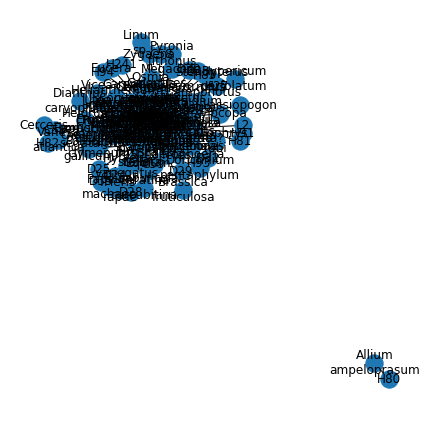

In [11]:
nx.draw_networkx(B1)

In [ ]:
# Get node sets
pollinators = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
plants = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

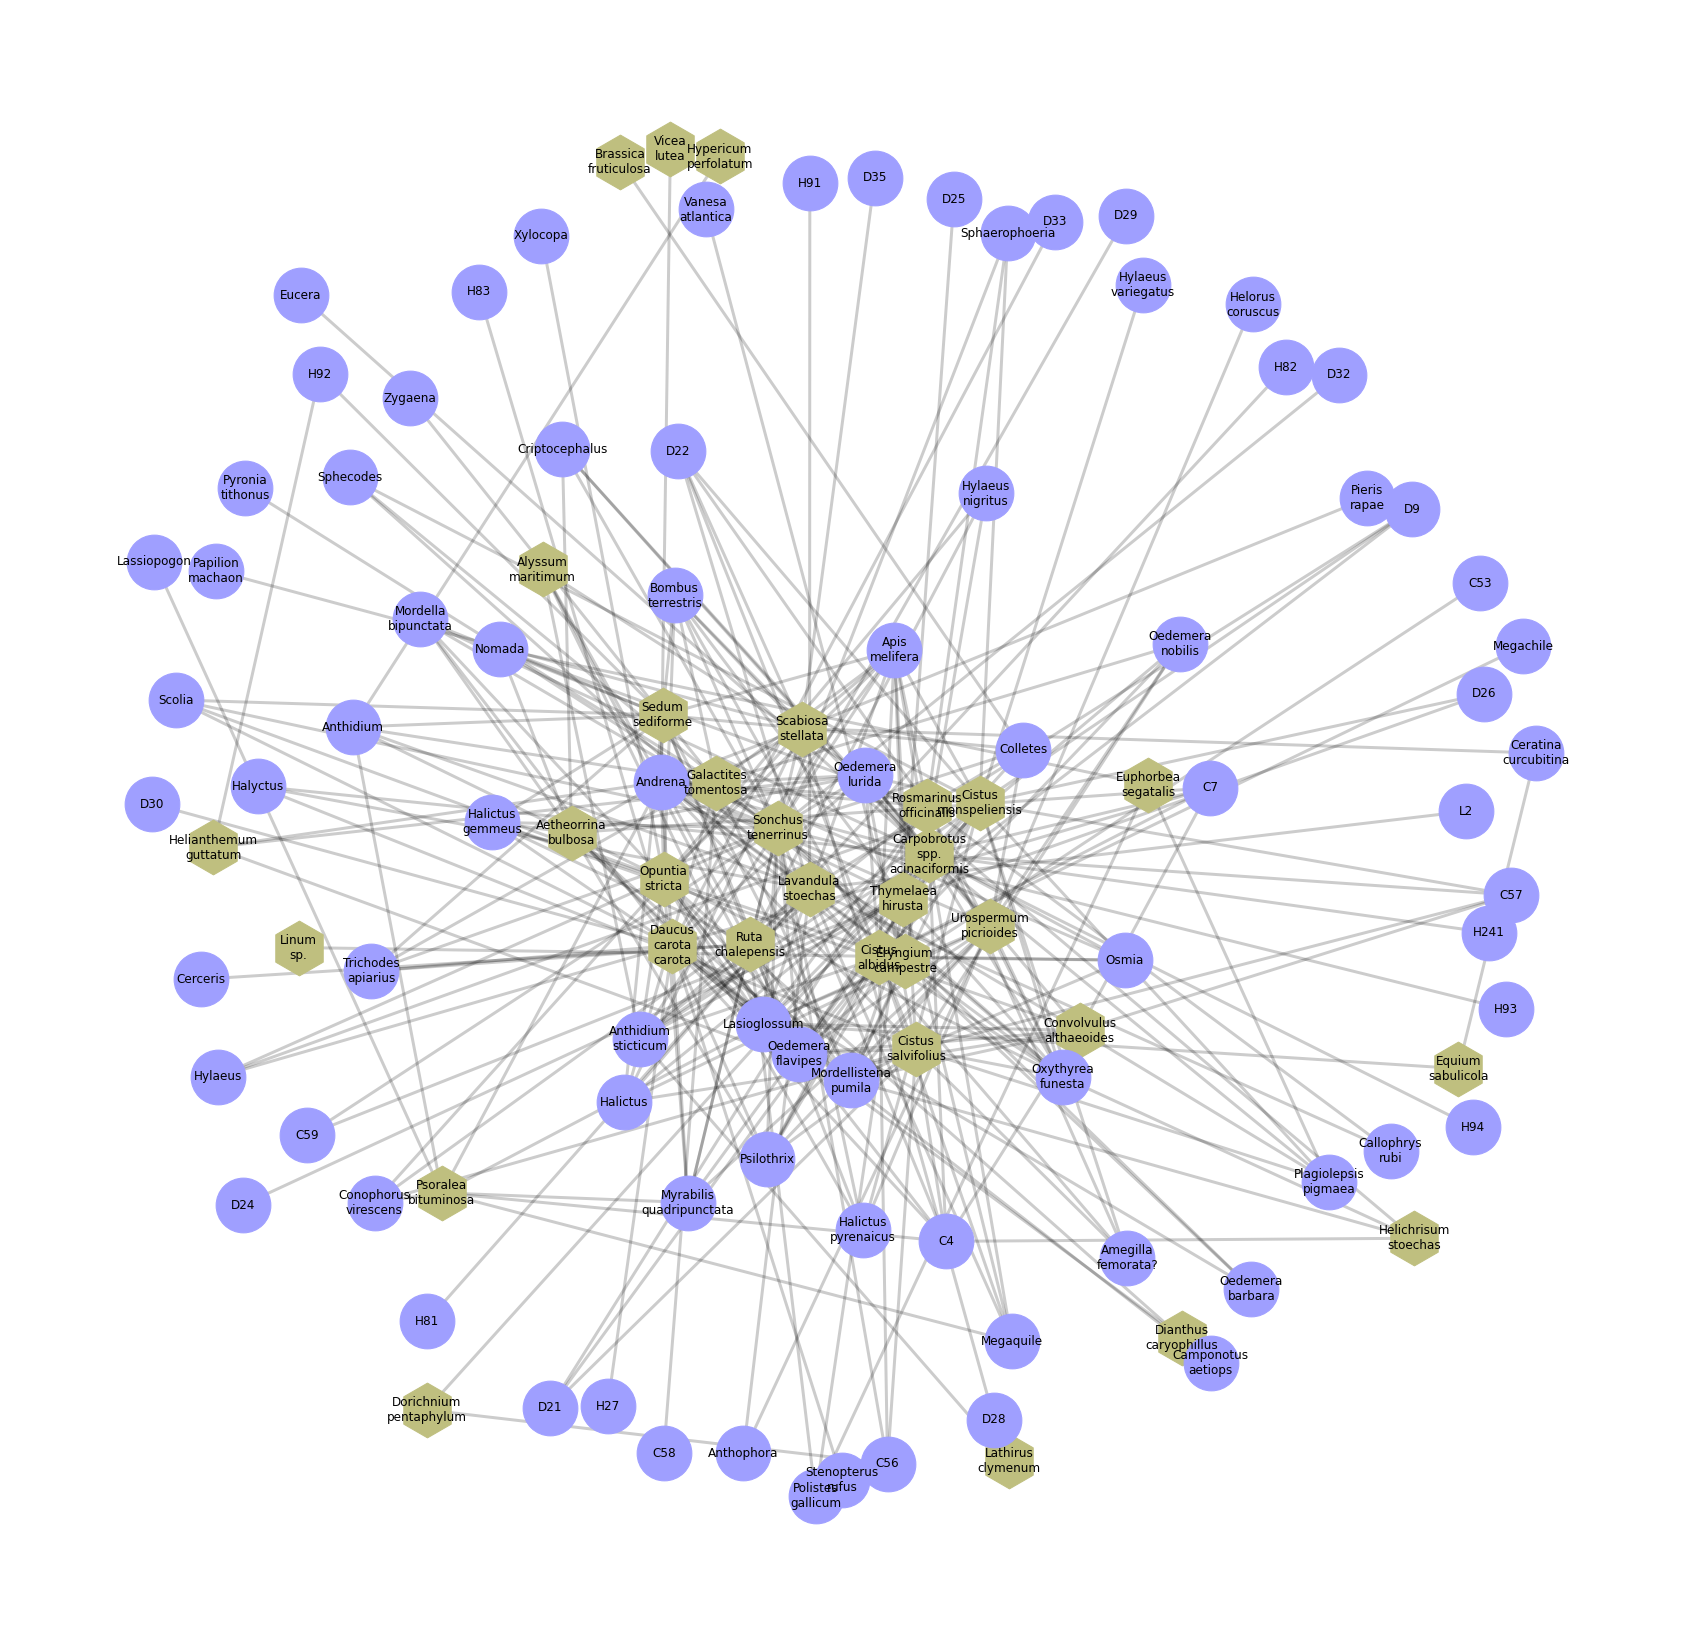

In [ ]:
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(B, k=0.9)
# Draw using different shapes and colors for plant/pollinators
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#bfbf7f", node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#9f9fff", node_size=3000)
nx.draw_networkx_labels(B, pos)
plt.savefig('output-4.1.png', dpi=150)

## Projections

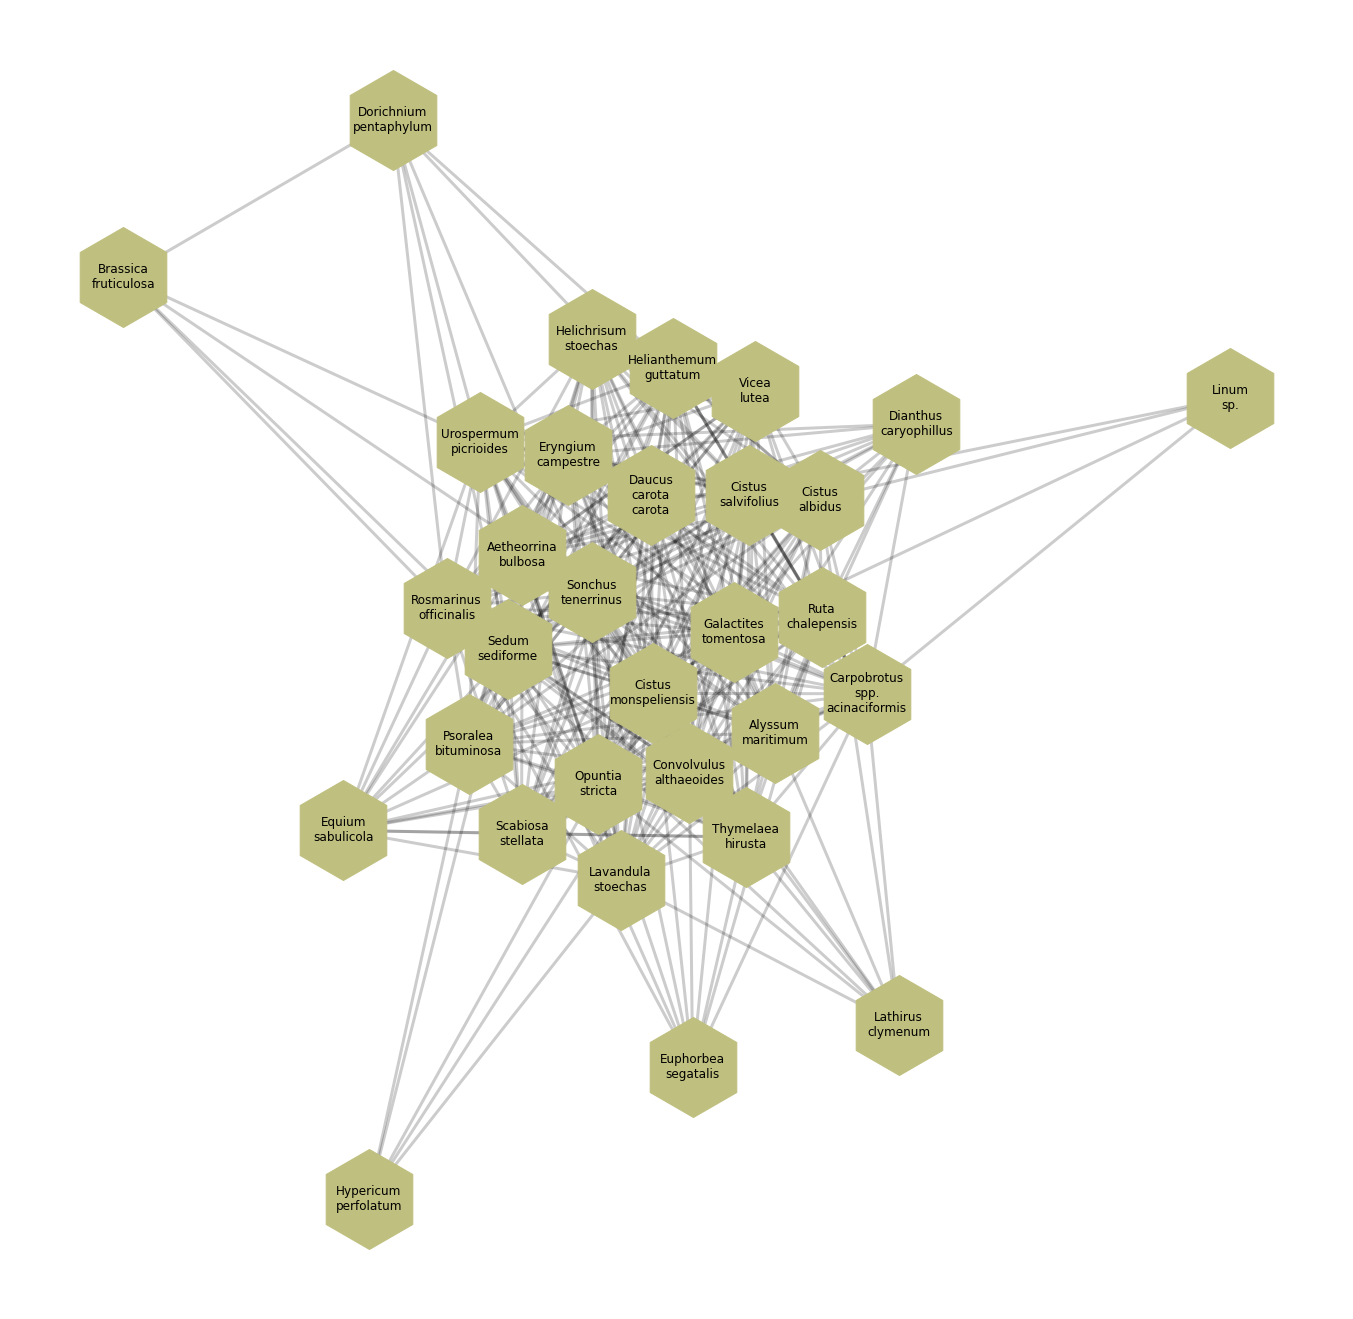

In [ ]:
# Create co-affiliation network
G = bipartite.projected_graph(B, plants)
# Create figure
plt.figure(figsize=(24,24))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#bfbf7f", node_shape="h", node_size=10000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.2.png', dpi=150)

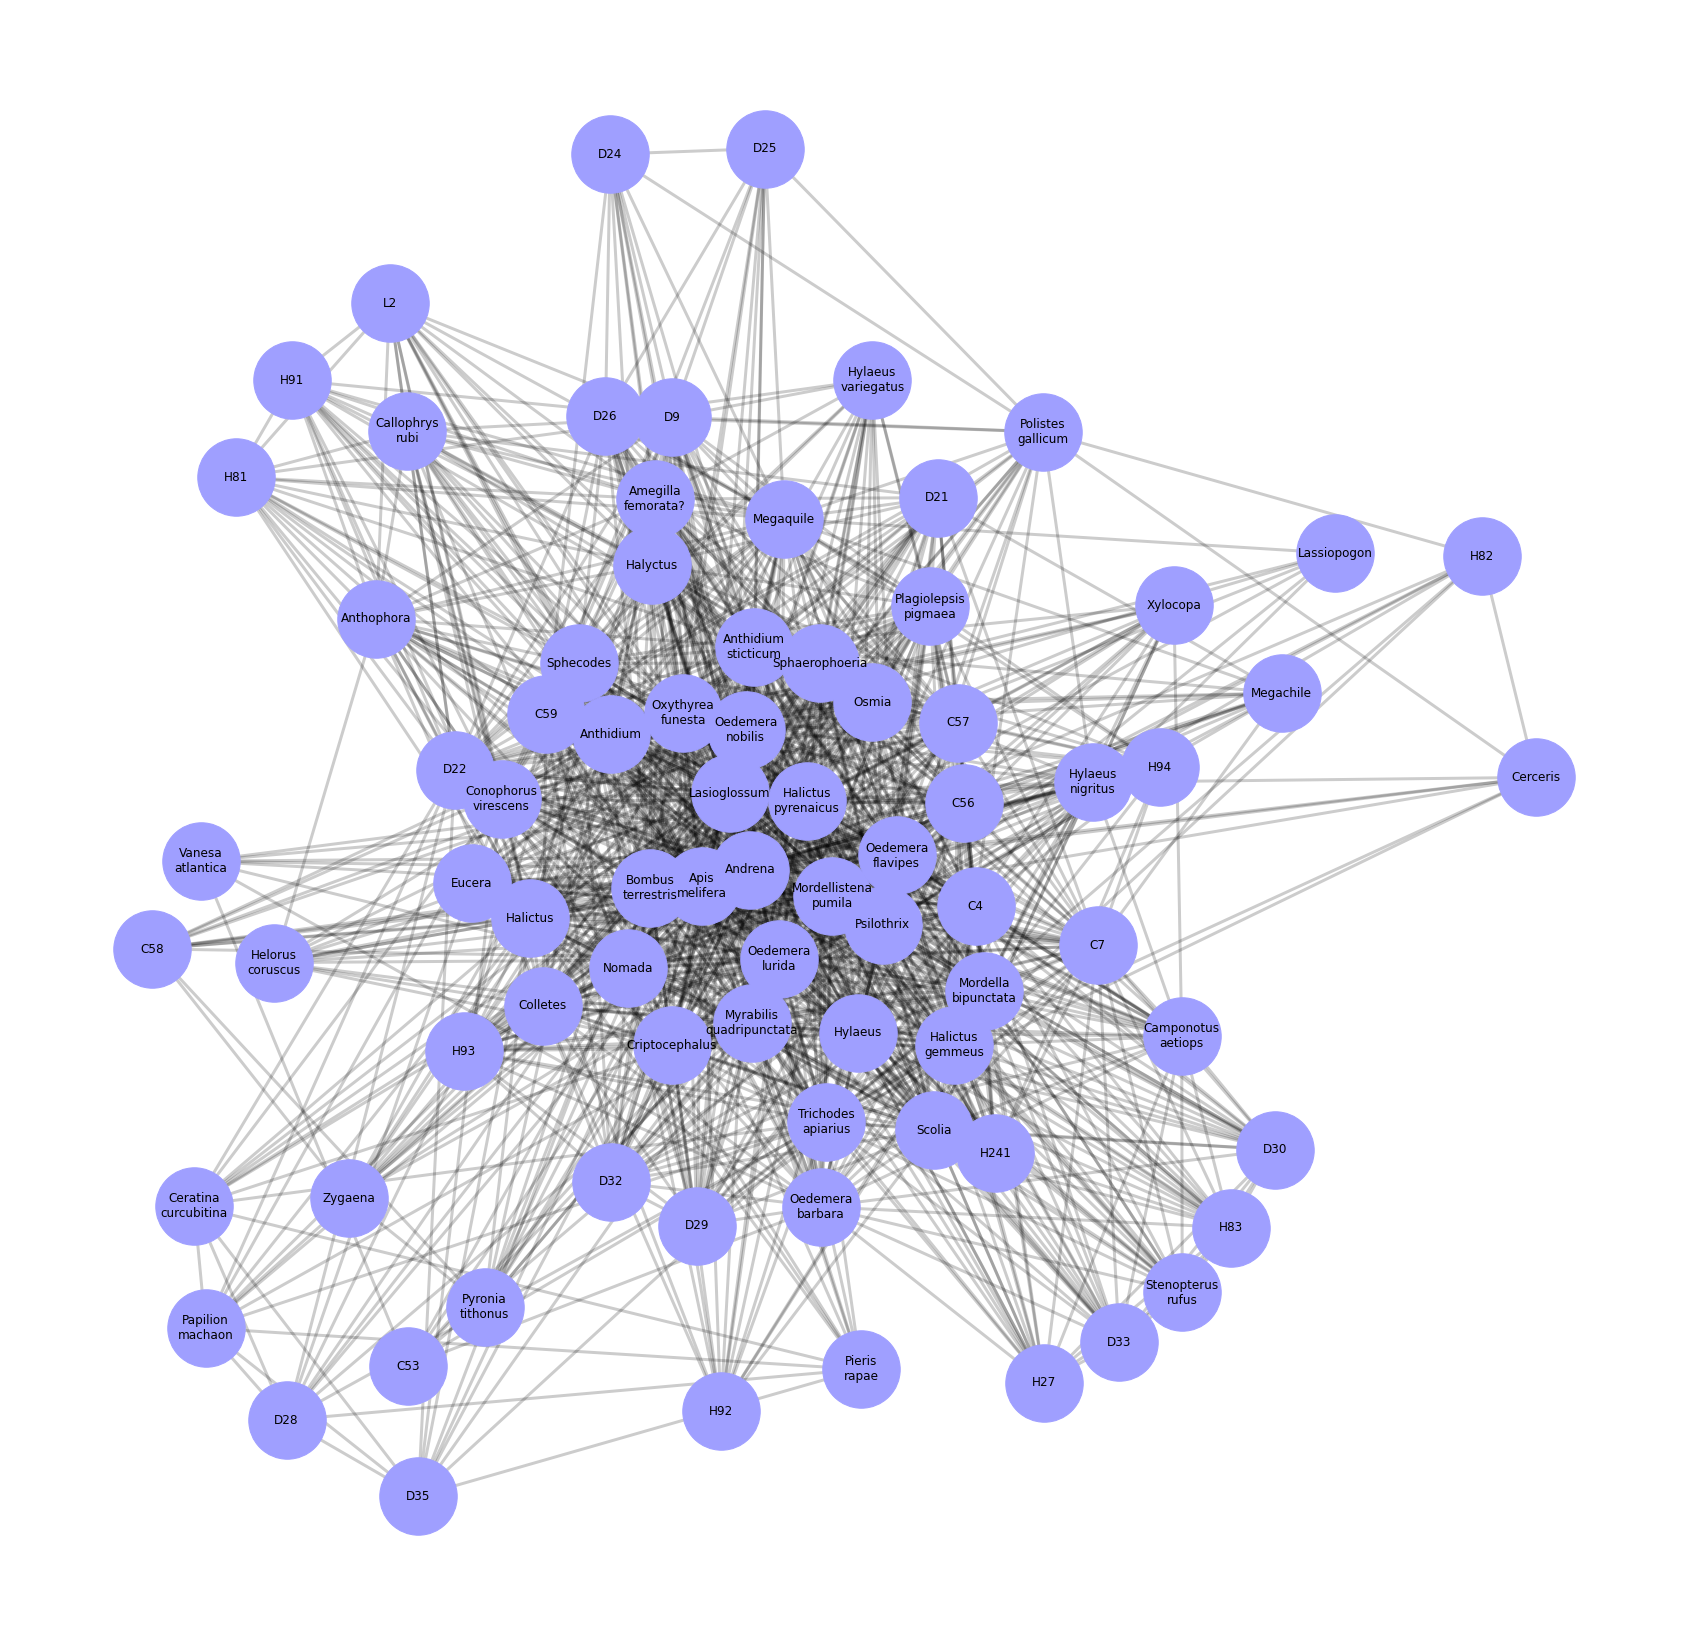

In [ ]:
# Create co-affiliation network
G = bipartite.projected_graph(B, pollinators)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.3.png', dpi=150)

In [ ]:
G = bipartite.weighted_projected_graph(B, plants)
list(G.edges(data=True))[0]

('Urospermum\npicrioides', 'Opuntia\nstricta', {'weight': 7})

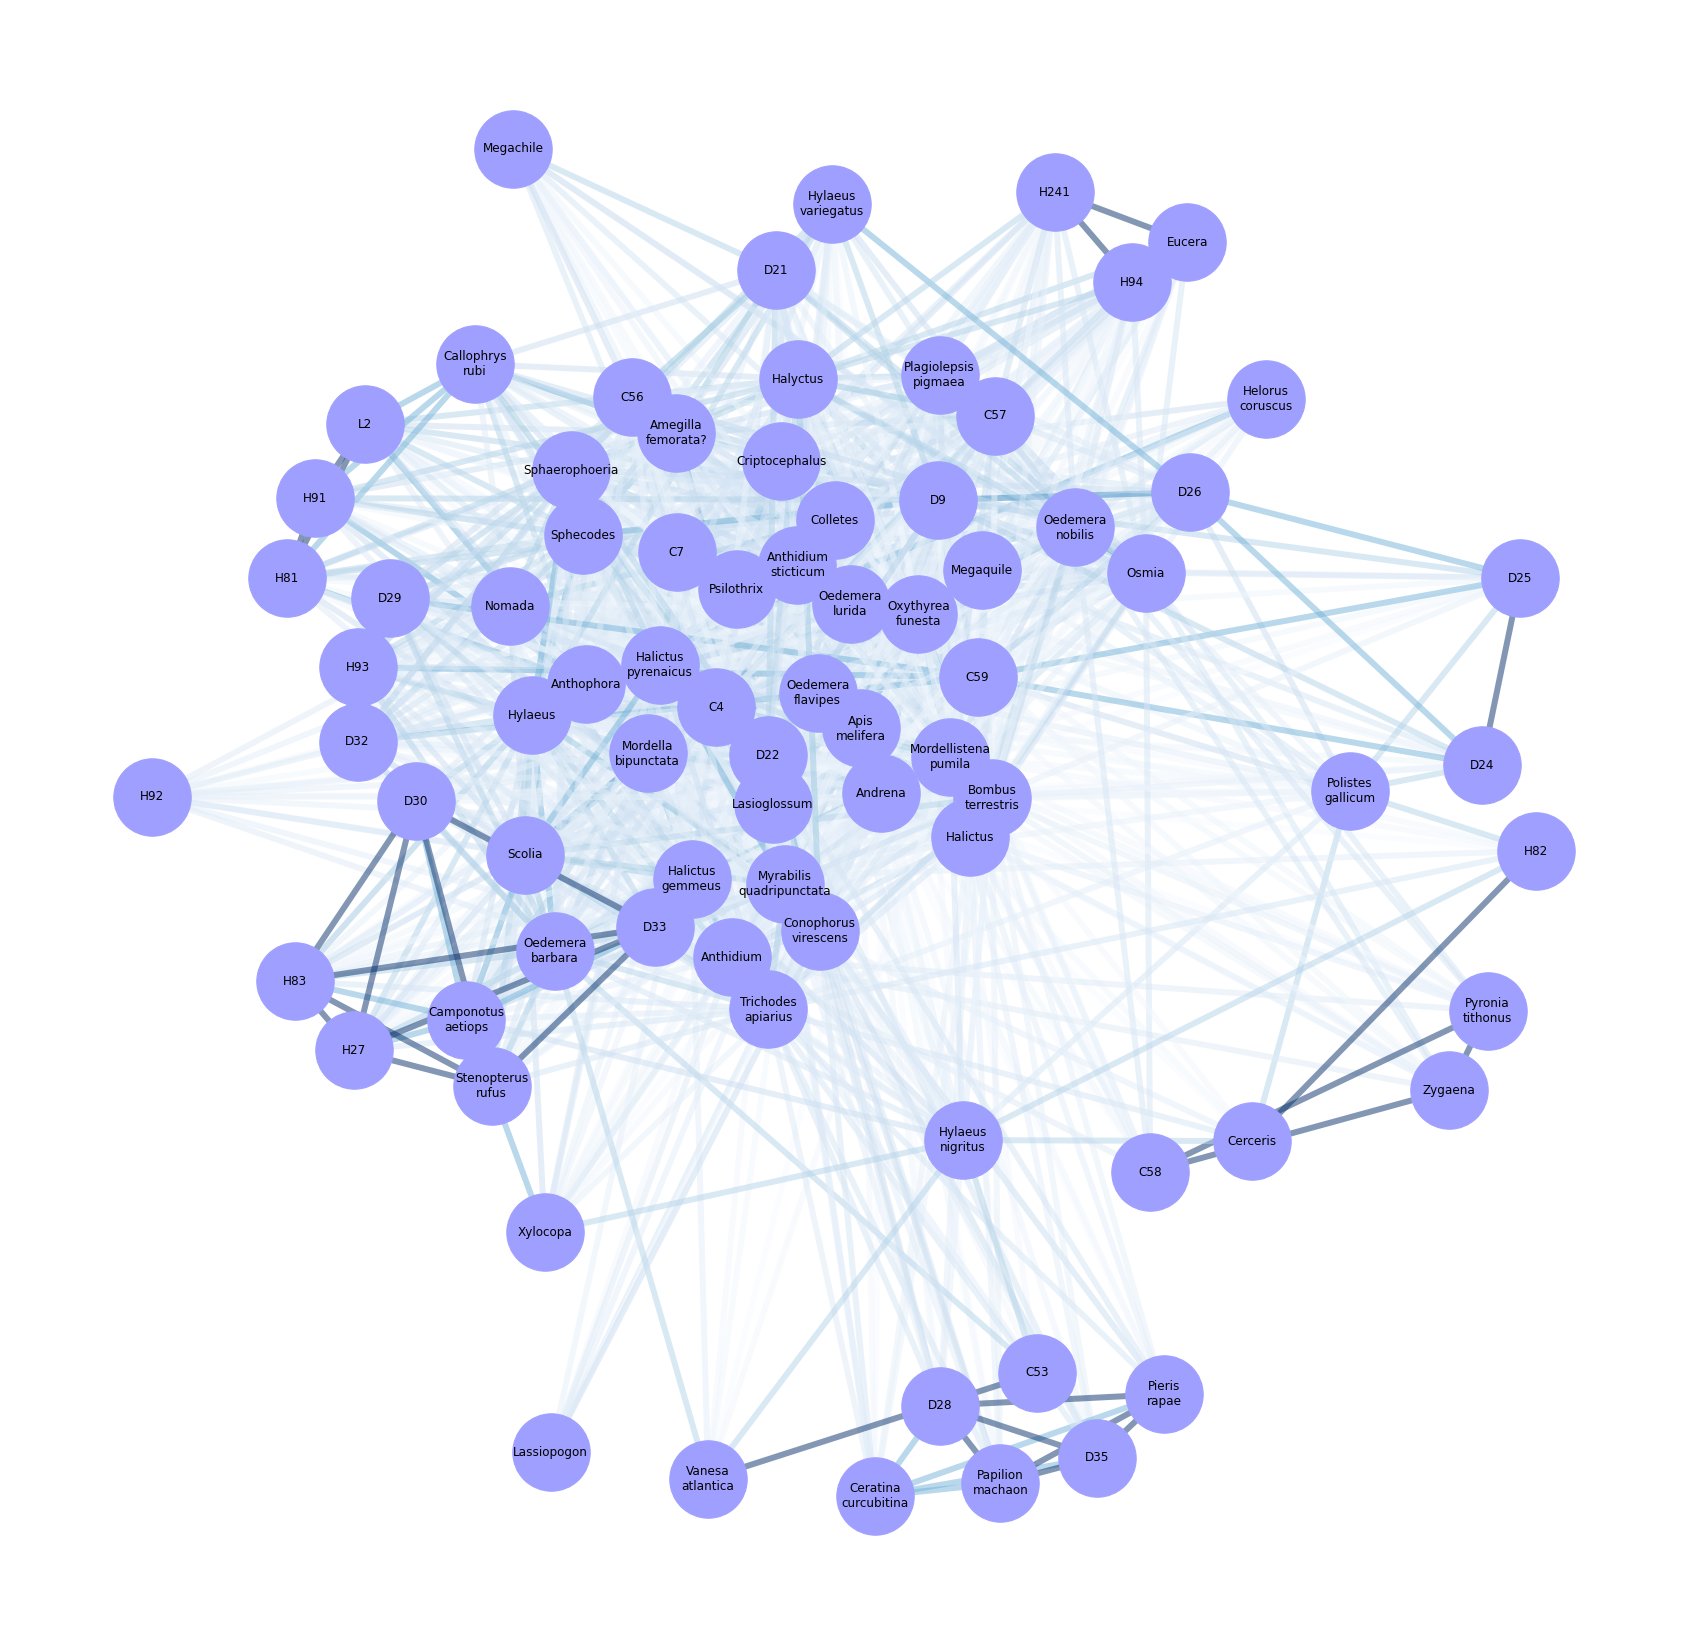

In [ ]:
# Create co-affiliation network
G = bipartite.overlap_weighted_projected_graph(B, pollinators)
# Get weights
weight = [G.edges[e]['weight'] for e in G.edges]
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues, width=6, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.4.png', dpi=150)